# First let's import the packages we will use in this project. You can do this all now or as you need them

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv("../input/movies-updatedratingscleaned/movies_UpdatedRatings.csv")


In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,9,PG-13,Animation,2009,"September 9, 2009 (United States)",7.1,135000.0,Shane Acker,Pamela Pettler,Elijah Wood,United States,30000000.0,48428063.0,Focus Features,79.0
1,21,PG-13,Crime,2008,"March 28, 2008 (United States)",6.8,235000.0,Robert Luketic,Peter Steinfeld,Jim Sturgess,United States,35000000.0,159808370.0,Columbia Pictures,123.0
2,31,R,Horror,2016,"September 16, 2016 (United States)",5.1,19000.0,Rob Zombie,Rob Zombie,Malcolm McDowell,United Kingdom,1500000.0,850419.0,Bow and Arrow Entertainment,102.0
3,42,PG-13,Biography,2013,"April 12, 2013 (United States)",7.5,89000.0,Brian Helgeland,Brian Helgeland,Chadwick Boseman,United States,40000000.0,97470701.0,Warner Bros.,128.0
4,54,R,Drama,1998,"August 28, 1998 (United States)",5.8,32000.0,Mark Christopher,Mark Christopher,Ryan Phillippe,United States,13000000.0,16757163.0,Dollface,93.0


# We need to see if we have any missing data. Let's loop through the data and see if there is anything missing

In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


# The original dataset had about 2% missing data for Ratings (77 entries in total). I went back to the original CSV file and copied all of the movie titltes without a rating, ran a script in ChatGPT to extract all of the current movie ratings for each one and cleaned the data in Excel prior to reloading the new dataset.

# For the sake of time, I simply removed the missing data for budget(28%) and gross(2%) below. 

In [4]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

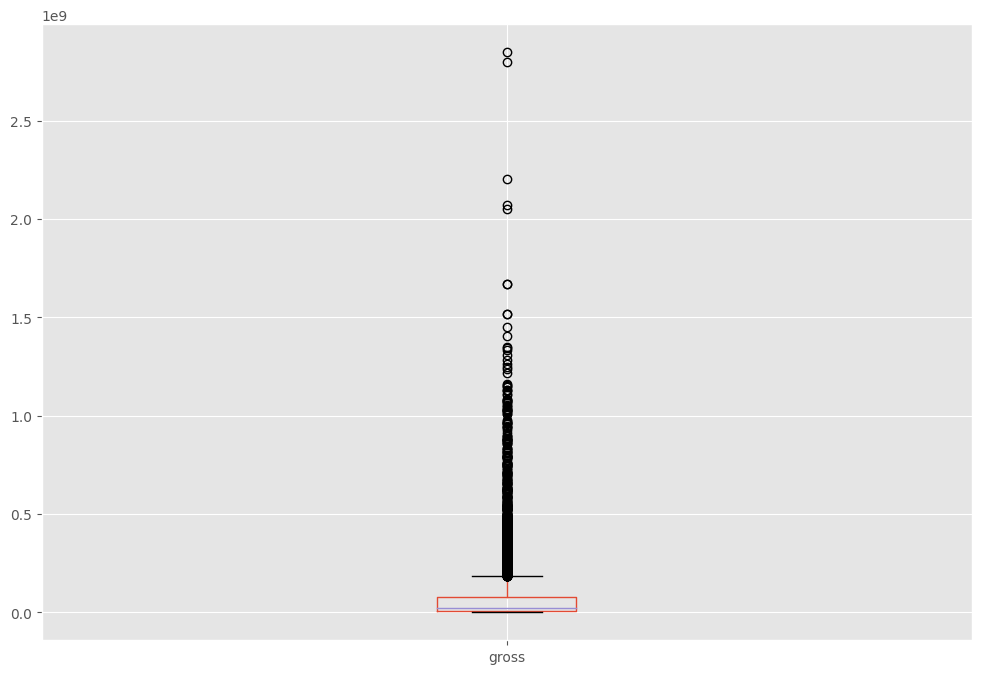

In [5]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [6]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,9,PG-13,Animation,2009,"September 9, 2009 (United States)",7.1,135000.0,Shane Acker,Pamela Pettler,Elijah Wood,United States,30000000.0,4.842806e+07,Focus Features,79.0
1,21,PG-13,Crime,2008,"March 28, 2008 (United States)",6.8,235000.0,Robert Luketic,Peter Steinfeld,Jim Sturgess,United States,35000000.0,1.598084e+08,Columbia Pictures,123.0
2,31,R,Horror,2016,"September 16, 2016 (United States)",5.1,19000.0,Rob Zombie,Rob Zombie,Malcolm McDowell,United Kingdom,1500000.0,8.504190e+05,Bow and Arrow Entertainment,102.0
3,42,PG-13,Biography,2013,"April 12, 2013 (United States)",7.5,89000.0,Brian Helgeland,Brian Helgeland,Chadwick Boseman,United States,40000000.0,9.747070e+07,Warner Bros.,128.0
4,54,R,Drama,1998,"August 28, 1998 (United States)",5.8,32000.0,Mark Christopher,Mark Christopher,Ryan Phillippe,United States,13000000.0,1.675716e+07,Dollface,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,Zoolander 2,PG-13,Action,2016,"February 12, 2016 (United States)",4.7,66000.0,Ben Stiller,Justin Theroux,Ben Stiller,United States,50000000.0,5.672269e+07,Panorama Films,101.0
7664,Zoom,PG,Action,2006,"August 11, 2006 (United States)",4.4,19000.0,Peter Hewitt,Adam Rifkin,Tim Allen,United States,35000000.0,1.250636e+07,Revolution Studios,83.0
7665,Zoot Suit,R,Drama,1981,"January 1, 1982 (United States)",6.8,1100.0,Luis Valdez,Luis Valdez,Daniel Valdez,United States,2700000.0,3.256082e+06,Universal Pictures,103.0
7666,Zootopia,PG,Animation,2016,"March 4, 2016 (United States)",8.0,450000.0,Byron Howard,Byron Howard,Ginnifer Goodwin,United States,150000000.0,1.024121e+09,Walt Disney Pictures,108.0


In [7]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
540,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
542,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7043,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
5260,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
543,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,Wicked Stepmother,PG-13,Comedy,1989,"February 3, 1989 (United States)",4.3,1800.0,Larry Cohen,Larry Cohen,Bette Davis,United States,2500000.0,NaN,Larco Productions,90.0
7542,Windwalker,PG,Adventure,1980,"November 18, 1983 (Sweden)",6.9,1000.0,Kieth Merrill,Ray Goldrup,Trevor Howard,United States,3000000.0,NaN,Santa Fe International,108.0
7592,Wuthering Heights,Not Rated,Drama,1985,"October 9, 1985 (France)",6.5,339.0,Jacques Rivette,Pascal Bonitzer,Fabienne Babe,France,NaN,NaN,La Cecilia,130.0
7637,Young Warriors,R,Action,1983,"August 28, 1983 (United States)",4.7,460.0,Lawrence David Foldes,Russell W. Colgin,Ernest Borgnine,United States,NaN,NaN,Star Cinema,105.0


<Axes: xlabel='gross', ylabel='budget'>

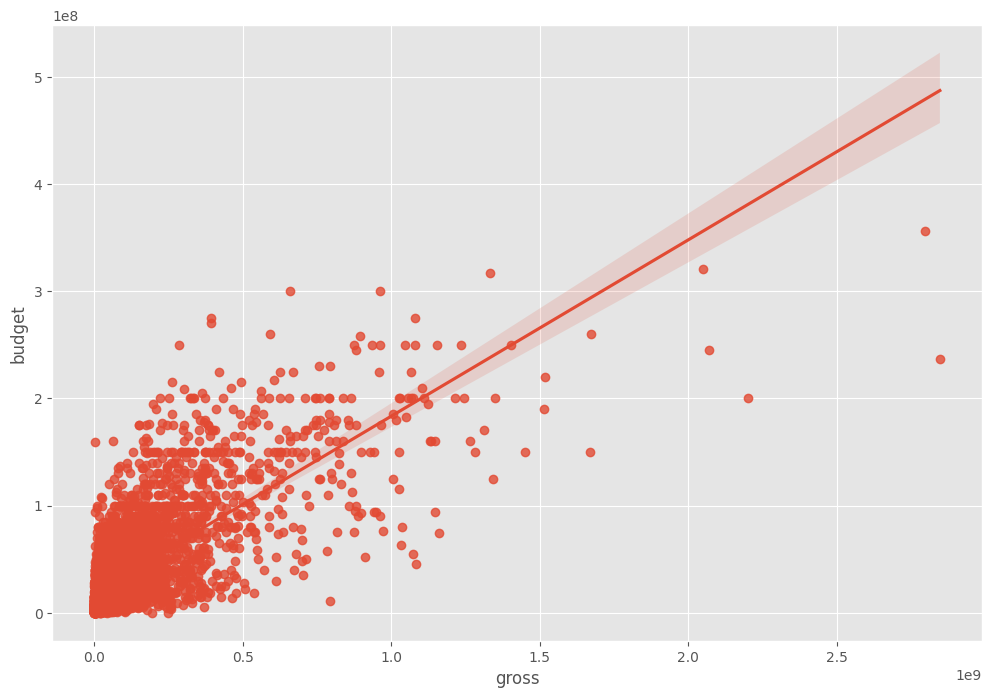

In [8]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

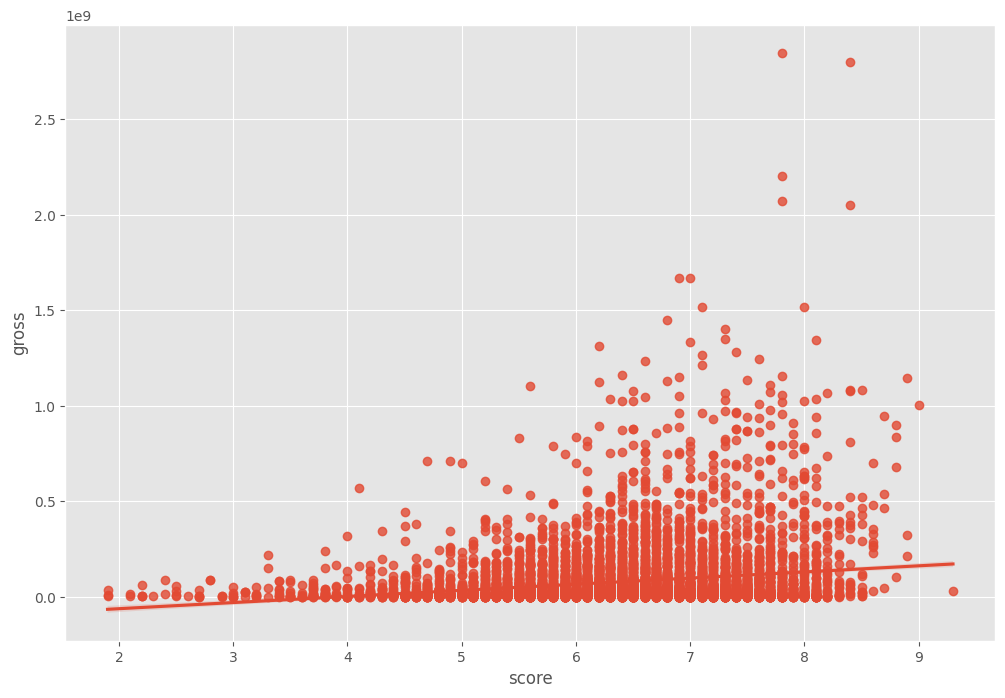

In [9]:
sns.regplot(x="score", y="gross", data=df)

In [10]:
# Correlation Matrix between all numeric columns

df.corr(numeric_only=True,method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [11]:
df.corr(numeric_only=True,method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [12]:
df.corr(numeric_only=True,method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


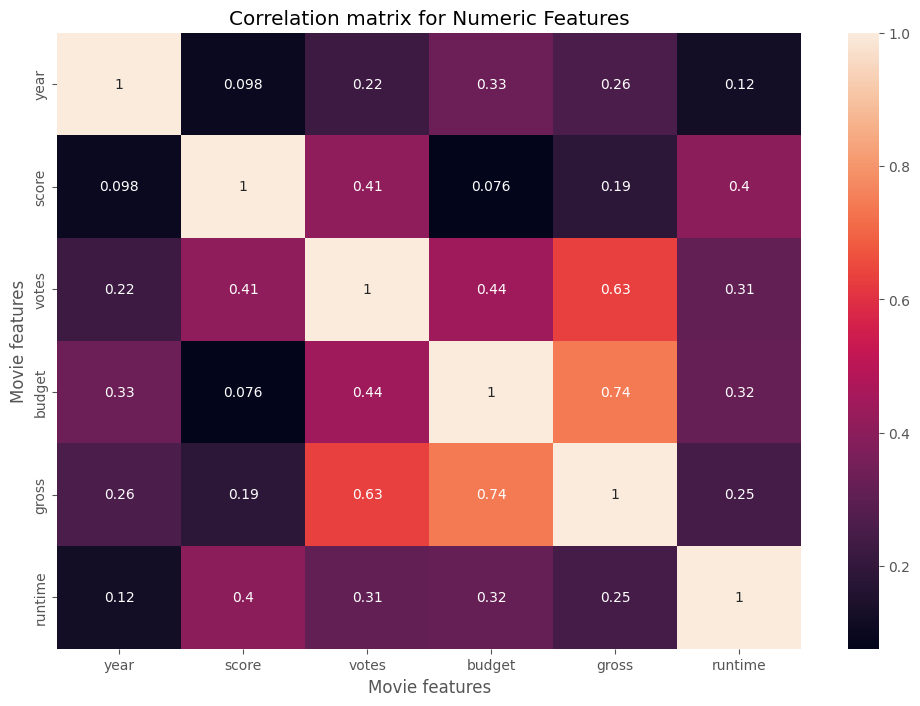

In [13]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [14]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(numeric_only=True, method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.002591,-0.019302,0.004498,0.481182,0.002054,0.130263,0.395289,0.599938,0.365379,0.030520,0.071771,0.957746,0.293854,0.008549
rating,-0.002591,1.000000,-0.112841,0.034434,0.048842,-0.018988,-0.033250,0.086771,0.043212,0.163041,0.161861,-0.074108,-0.032399,0.169107,0.038845
genre,-0.019302,-0.112841,1.000000,0.054659,-0.013516,0.042707,-0.009238,-0.053148,-0.009337,-0.027485,-0.059054,-0.030478,-0.026109,-0.044571,-0.068772
year,0.004498,0.034434,0.054659,1.000000,-0.006077,0.035317,-0.018763,0.008802,0.037825,0.029628,-0.007691,-0.015769,-0.014634,0.047547,-0.029445
released,0.481182,0.048842,-0.013516,-0.006077,1.000000,0.003761,0.101304,0.254967,0.348014,0.243060,0.091503,0.052982,0.442888,0.232325,0.028516
score,0.002054,-0.018988,0.042707,0.035317,0.003761,1.000000,0.059260,0.041113,0.028645,0.056200,-0.025003,0.000907,-0.003086,-0.005780,0.049575
votes,0.130263,-0.033250,-0.009238,-0.018763,0.101304,0.059260,1.000000,0.043607,0.055280,0.019448,-0.033517,0.092002,0.093713,-0.009026,0.080053
director,0.395289,0.086771,-0.053148,0.008802,0.254967,0.041113,0.043607,1.000000,0.440438,0.368982,0.102401,-0.020057,0.352067,0.325248,-0.013302
writer,0.599938,0.043212,-0.009337,0.037825,0.348014,0.028645,0.055280,0.440438,1.000000,0.324686,0.077354,0.007700,0.559223,0.289228,0.010407
star,0.365379,0.163041,-0.027485,0.029628,0.243060,0.056200,0.019448,0.368982,0.324686,1.000000,0.150357,-0.010154,0.316646,0.316884,-0.000493


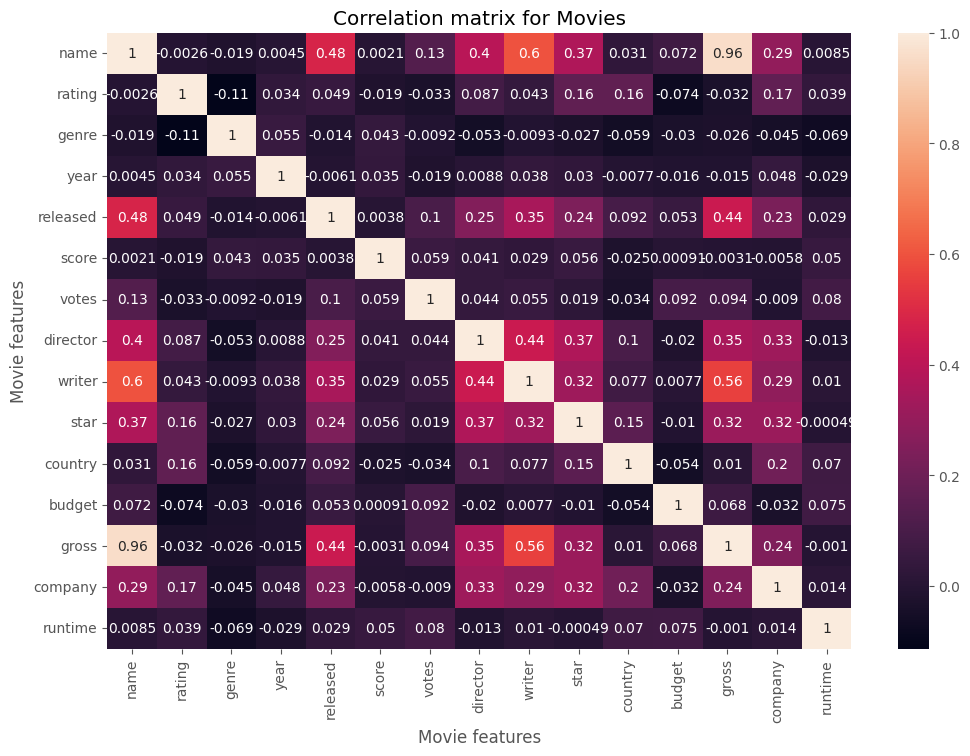

In [15]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [16]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating     -0.002591
         genre      -0.019302
         year        0.004498
         released    0.481182
                       ...   
runtime  country     0.070143
         budget      0.075114
         gross      -0.001023
         company     0.014125
         runtime     1.000000
Length: 225, dtype: float64


In [17]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating   genre     -0.112841
genre    rating    -0.112841
rating   budget    -0.074108
budget   rating    -0.074108
genre    runtime   -0.068772
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [18]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

writer    gross       0.559223
gross     writer      0.559223
writer    name        0.599938
name      writer      0.599938
gross     name        0.957746
name      gross       0.957746
          name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [19]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [20]:
df['Year'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,9,PG-13,Animation,2009,"September 9, 2009 (United States)",7.1,135000.0,Shane Acker,Pamela Pettler,Elijah Wood,United States,30000000.0,48428063.0,Focus Features,79.0,Sept
1,21,PG-13,Crime,2008,"March 28, 2008 (United States)",6.8,235000.0,Robert Luketic,Peter Steinfeld,Jim Sturgess,United States,35000000.0,159808370.0,Columbia Pictures,123.0,Marc
2,31,R,Horror,2016,"September 16, 2016 (United States)",5.1,19000.0,Rob Zombie,Rob Zombie,Malcolm McDowell,United Kingdom,1500000.0,850419.0,Bow and Arrow Entertainment,102.0,Sept
3,42,PG-13,Biography,2013,"April 12, 2013 (United States)",7.5,89000.0,Brian Helgeland,Brian Helgeland,Chadwick Boseman,United States,40000000.0,97470701.0,Warner Bros.,128.0,Apri
4,54,R,Drama,1998,"August 28, 1998 (United States)",5.8,32000.0,Mark Christopher,Mark Christopher,Ryan Phillippe,United States,13000000.0,16757163.0,Dollface,93.0,Augu


In [21]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


In [22]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [23]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

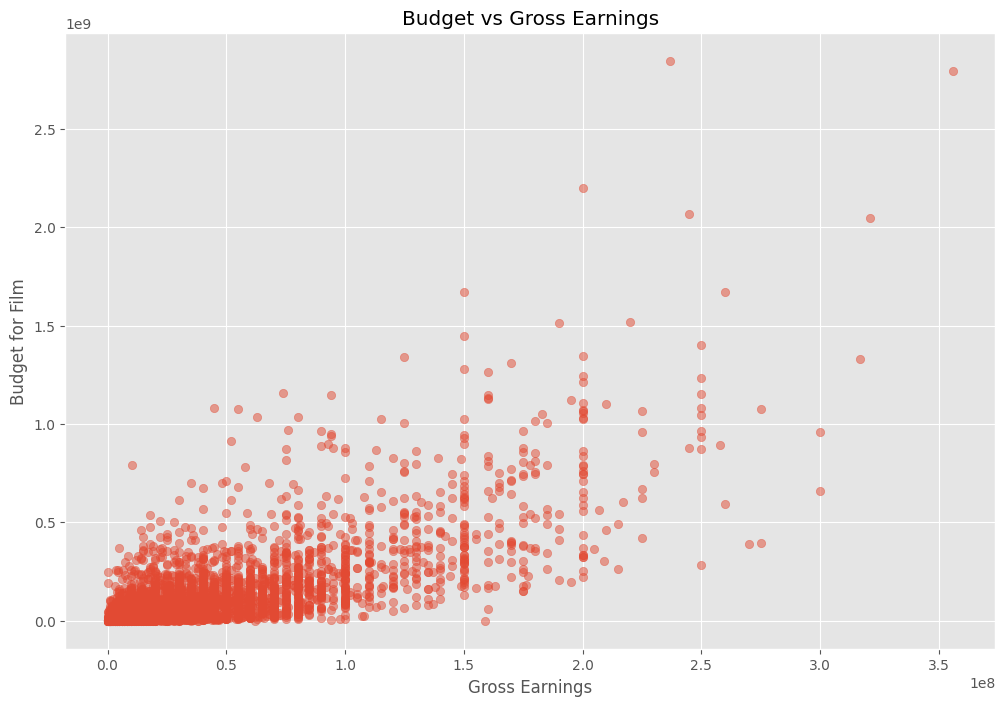

In [24]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

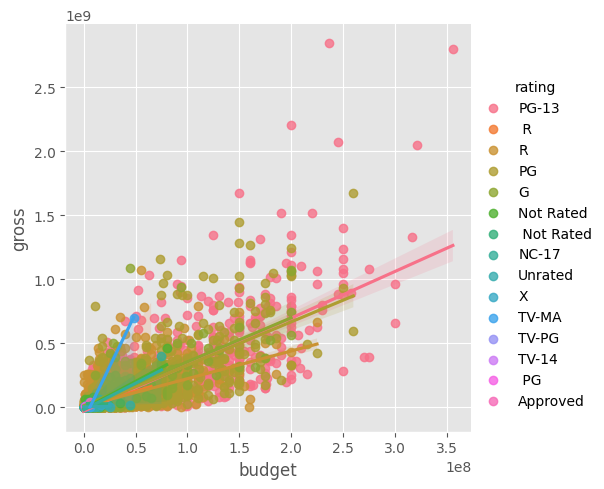

In [25]:
sns.lmplot(x='budget', y='gross', hue='rating', data=df)

In [26]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,90,8,2,2009,3410,7.1,135000.0,2542,3240,730,55,30000000.0,4.842806e+07,1090,79.0,19
1,36,8,5,2008,2121,6.8,235000.0,2383,3393,1240,55,35000000.0,1.598084e+08,731,123.0,15
2,61,2,10,2016,3192,5.1,19000.0,2350,3591,1711,54,1500000.0,8.504190e+05,458,102.0,19
3,67,8,3,2013,44,7.5,89000.0,323,529,385,55,40000000.0,9.747070e+07,2319,128.0,8
4,78,9,6,1998,492,5.8,32000.0,1786,2755,2311,55,13000000.0,1.675716e+07,872,93.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7501,8,0,2016,923,4.7,66000.0,226,2365,230,55,50000000.0,5.672269e+07,1802,101.0,11
7664,7502,7,0,2006,310,4.4,19000.0,2187,41,2611,55,35000000.0,1.250636e+07,1966,83.0,9
7665,7503,9,6,1981,1125,6.8,1100.0,1726,2671,555,55,2700000.0,3.256082e+06,2281,103.0,12
7666,7504,7,2,2016,2175,8.0,450000.0,362,576,905,55,150000000.0,1.024121e+09,2316,108.0,15


In [27]:
df_numerized.corr(numeric_only=True, method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.009022,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,-0.011725
rating,-0.009022,1.000000,0.058696,-0.001133,0.012455,-0.001125,0.033143,0.025555,-0.001748,0.010757,0.082502,-0.162030,-0.102073,-0.025617,0.061436,0.009378
genre,0.016355,0.058696,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,0.028397
year,0.011453,-0.001133,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,-0.001562
released,-0.011311,0.012455,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,0.993694
score,0.017097,-0.001125,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.040993
votes,0.013088,0.033143,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.017337
director,0.009079,0.025555,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.000105
writer,0.009081,-0.001748,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.002892
star,0.006472,0.010757,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,0.015406


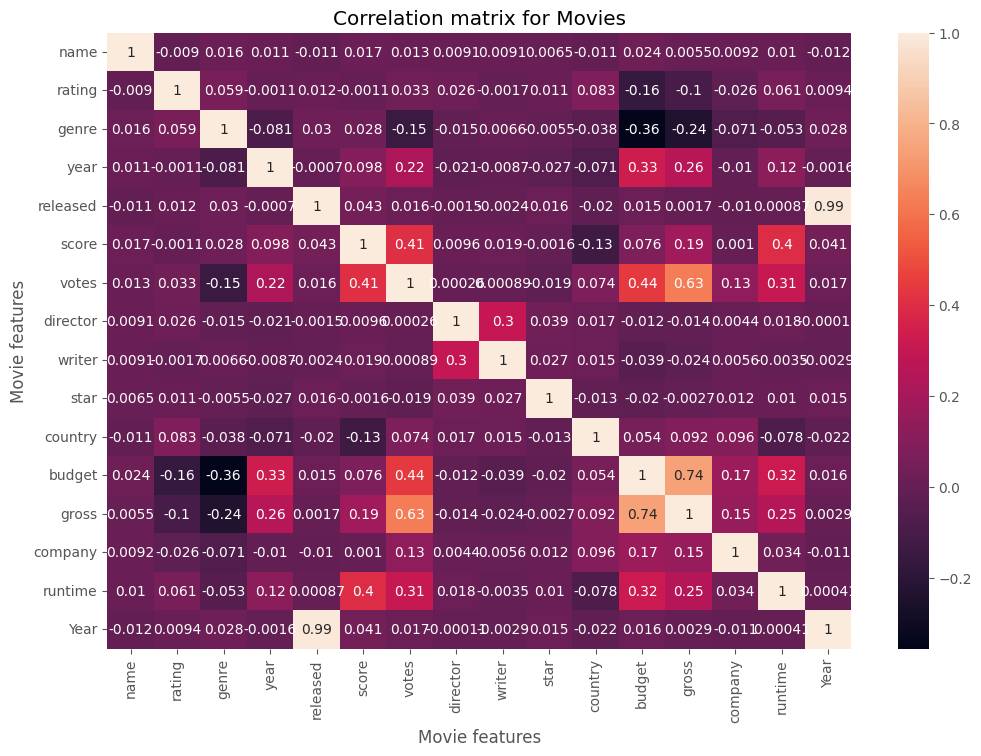

In [28]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()